<div align="center">
  <h1>K-Means Clustering Algorithm</h1>
  <p style="font-size: 14px;">31.10.2024</p>
</div>

---

# Problem 3: K-Means Clustering and Centroid Norm Averaging 

#### **Introduction**
Upon generating **10000** samples from **2D Gaussian Distribution** we want to **cluster** those points into **3** blobs using **K-Means Algorithm**. The goal is to analize how the average norm of these centroids changes and empirically estimate the number of iterations needed to get to the **stable 9 digit accuracy**.

#### **Data preparation**
First we generate 10000 samples from **2D Gaussian Distribution** and also k=3 random centroids that define our labels. We also keep track of the changes made to our centroids in centroid_history array.

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

# Problem setup
n = 10000
k = 3
R_i = 124

cov = [[1, 0], [0 ,1]]
mean = [1, 1]

point_labels = np.zeros(n)
points = np.random.multivariate_normal(mean, cov, n)

centroids = np.random.multivariate_normal(mean, cov, k) # centroids[0] means label '0' etc.
centroid_history = [[] for i in range(k)]

#### **Helper functions**
- determine_label is a function that takes point and calculates which of the k centroids is closest to it, thus returning its label
- new_centroid sums up all the points together (of a cluster/label) and calculates their cumulative point of mass or simply new centroid

In [63]:
def determine_label(point):
  label = 0
  distance = np.linalg.norm(point - centroids[0])

  for i in range(1, k):
    new_distance = np.linalg.norm(point - centroids[i])

    if (new_distance < distance):
      label = i
      distance = new_distance
  
  return label

def new_centroid(label):
  filter_out = np.zeros(len(point_labels), dtype=bool)
  
  for i in range(len(point_labels)):
    filter_out[i] = (point_labels[i] == label)

  S: np.ndarray = points[filter_out]
  sigma = np.cumsum(S, axis=0)[-1]
  return sigma / len(S)

#### **K-means Algorithm**
This algorithm is very simple and useful. It consists of these steps:
- For every iteration i,
    1. Determine Labels of each Point
    2. Calculate new Centroid of each label/cluster


In [64]:
for i in tqdm(range(R_i)):
  for p_idx in range(len(points)):
    point = points[p_idx]
    
    point_labels[p_idx] = determine_label(point)

    
  for c_idx in range(len(centroids)):
    centroid_history[c_idx].append(centroids[c_idx].copy())
    centroids[c_idx] = new_centroid(c_idx)

100%|██████████| 124/124 [00:06<00:00, 19.57it/s]


#### **History of Centorids analysis**
Now we have captured all the changes made for each centroid throughout iterations. Now in each iteration i, we are going to calculate average norm of i-th centroids from history. 

In [65]:
average_norms = []

for i in range(R_i):
  norms = []

  for j in range(k):
    centroid = centroid_history[j][i]

    norm = np.linalg.norm(centroid)
    norms.append(norm)
  
  average = np.average(norms)

  average_norms.append(average)

print(average_norms)

[np.float64(1.5678826302097992), np.float64(1.4332048291659714), np.float64(1.3937125523504834), np.float64(1.3589528637952197), np.float64(1.3959473799069235), np.float64(1.4584160054355488), np.float64(1.4986839934512926), np.float64(1.521976069291285), np.float64(1.5364685268997154), np.float64(1.5436811109615782), np.float64(1.5460749964041571), np.float64(1.548013744767772), np.float64(1.5488551798886487), np.float64(1.5497686205069234), np.float64(1.5501156646056067), np.float64(1.5506156849043853), np.float64(1.5506687468075777), np.float64(1.5506935976356442), np.float64(1.5505269829927524), np.float64(1.5506610162035266), np.float64(1.5508405249768238), np.float64(1.5510088646766438), np.float64(1.5510088646766438), np.float64(1.5510088646766438), np.float64(1.5510088646766438), np.float64(1.5510088646766438), np.float64(1.5510088646766438), np.float64(1.5510088646766438), np.float64(1.5510088646766438), np.float64(1.5510088646766438), np.float64(1.5510088646766438), np.float6

As stated in the problemset, now we are going to calcualte Cumulative Averages of norms. We also keep track of lowest index that reaches $10^{-9}$ mark.

In [66]:
result = []
best_i = R_i
last_cumavg = float('inf')
elipson = 1e-9

for i in range(R_i):
  cumavg = np.average(average_norms[i:])

  if abs(cumavg - last_cumavg) < elipson and i < best_i:
    best_i = i

  last_cumavg = cumavg

  result.append(cumavg)

print(best_i)


22


I gave this program couple of tries, and the anwser lies around 30, as for the latest run, I got 22... great, this is much lower than 88 as stated in the problem.

#### **Plotting the Cumulative Averages**

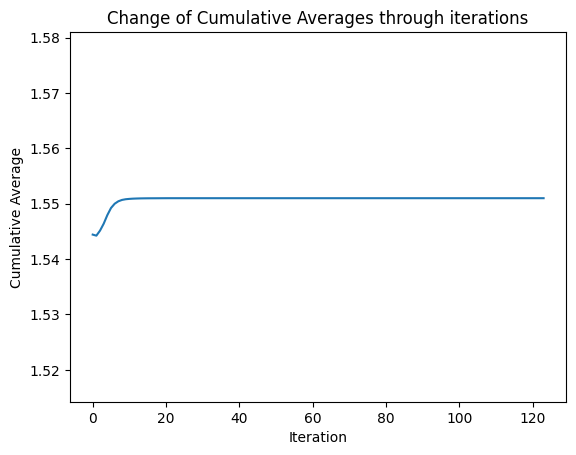

In [67]:
plt.title('Change of Cumulative Averages through iterations')
plt.ylabel('Cumulative Average')
plt.xlabel('Iteration')
plt.ylim(np.min(result) - 0.03, np.max(result) + 0.03)
plt.plot(range(R_i), result)
plt.show()


---
<div style="text-align: right;">
Piotr Stachowicz  
 
337942
</div>